Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Create Dataset


In [3]:
np.random.seed(42)


customers = np.random.randint(1000, 1100, 1000)
dates = pd.to_datetime("2023-01-01") + pd.to_timedelta(
    np.random.randint(0, 365, 1000), unit="D"
)

data = pd.DataFrame({
    "customer_id": customers,
    "purchase_date": dates,
    "order_value": np.random.randint(20, 500, 1000),
    "category": np.random.choice(
        ["Electronics", "Clothing", "Groceries", "Books"], 1000
    )
})
data.head()

,customer_id,purchase_date,order_value,category
0,1051,2023-02-03,314,Books
1,1092,2023-04-21,445,Clothing
2,1014,2023-09-21,262,Groceries
3,1071,2023-08-24,390,Groceries
4,1060,2023-03-24,205,Groceries


Data Cleaning

In [4]:
# Check missing values
data.isnull().sum()

# Remove duplicates
data.drop_duplicates(inplace=True)

# Ensure correct data types
data["purchase_date"] = pd.to_datetime(data["purchase_date"])


Feature Engineering (Purchase Frequency)

In [5]:
customer_metrics = data.groupby("customer_id").agg(
    purchase_count=("purchase_date", "count"),
    total_spent=("order_value", "sum"),
    avg_order_value=("order_value", "mean")
).reset_index()

customer_metrics.head()


,customer_id,purchase_count,total_spent,avg_order_value
0,1000,16,4142,258.875000
1,1001,13,4103,315.615385
2,1002,12,3055,254.583333
3,1003,11,3272,297.454545
4,1004,11,3884,353.090909


Exploratory Data Analysis (EDA)

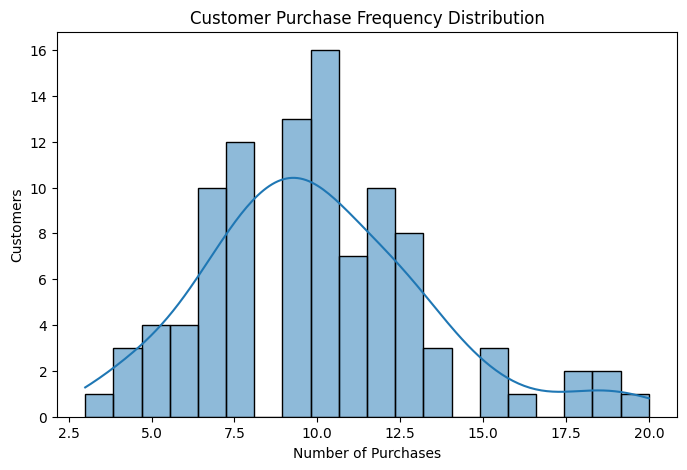

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(customer_metrics["purchase_count"], bins=20, kde=True)
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Customers")
plt.show()


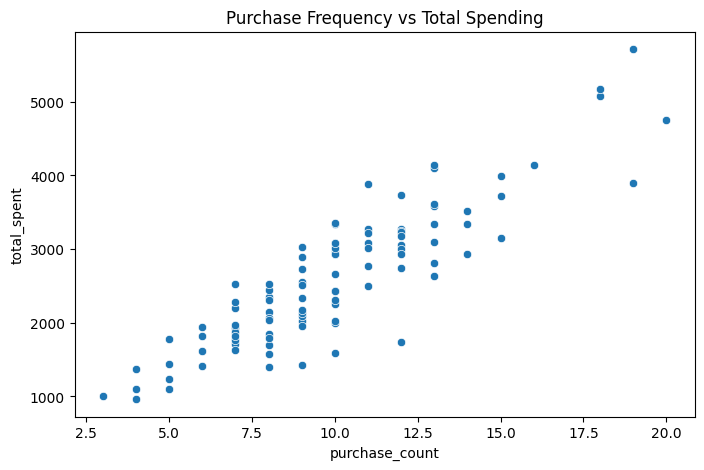

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="purchase_count",
    y="total_spent",
    data=customer_metrics
)
plt.title("Purchase Frequency vs Total Spending")
plt.show()


Spending vs Frequency

In [8]:
X = customer_metrics[["purchase_count", "total_spent"]]

kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics["segment"] = kmeans.fit_predict(X)


Deep Analysis: Customer Segmentation (K-Means)


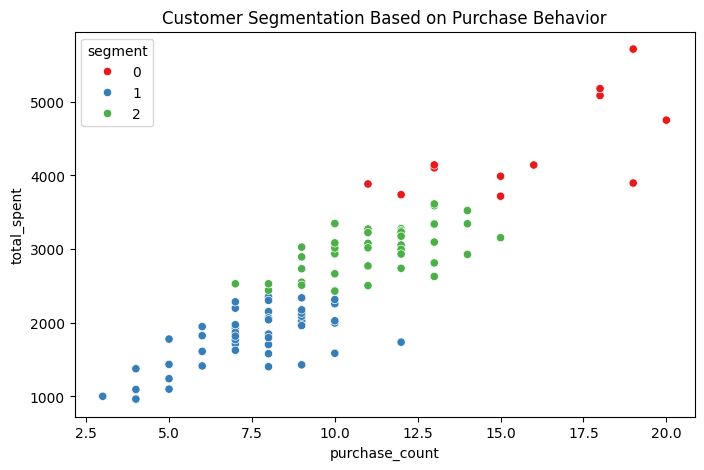

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="purchase_count",
    y="total_spent",
    hue="segment",
    palette="Set1",
    data=customer_metrics
)
plt.title("Customer Segmentation Based on Purchase Behavior")
plt.show()


Visualize Segments

In [10]:
customer_metrics["high_frequency"] = (
    customer_metrics["purchase_count"] >
    customer_metrics["purchase_count"].median()
).astype(int)


Machine Learning: Predict High-Frequency Customers

In [11]:
X = customer_metrics[["purchase_count", "avg_order_value", "total_spent"]]
y = customer_metrics["high_frequency"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Train Test Split

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
